In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

def action_name(a):
    if a == LEFT:
        return "LEFT"
    elif a == DOWN:
        return "DOWN"
    elif a == RIGHT:
        return "RIGHT"
    elif a == UP:
        return "UP"
    else:
        raise ValueError

In [3]:
class ObservationSapce:
    def __init__(self):
        self.n = 16
        
class ActionSpace:
    def __init__(self):
        self.n = 4
        
    def sample(self):
        return int(random.random() * self.n)
        
class Env:
    def __init__(self):
        self.observation_space = ObservationSapce()
        self.action_space = ActionSpace()
        self.reset()
    
    def reset(self):
        self.s = 5
        self.last_a = None
        self.done = False
        return self.s
    
    def reset_state(self, s):
        self.last_a = None
        self.s = s
        self.done = s == 0 or s == 15
    
    def step(self, a):
        if self.done:
            return (self.s, 0, self.done, None)
        
        srow = self.s // 4
        scol = self.s % 4
        # print(srow, scol, action_name(a))

        if a == LEFT:
            if scol > 0:
                scol -= 1
        elif a == DOWN:
            if srow < 3:
                srow += 1
        elif a == RIGHT:
            if scol < 3:
                scol += 1
        elif a == UP:
            if srow > 0:
                srow -= 1
        else:
            raise ValueError
        # print("=>", srow, scol)

        self.last_a = a
        self.s = srow * 4 + scol
        self.done = self.s == 0 or self.s == 15

        return (self.s, -1, self.done, None)

    def render(self):
        if self.last_a is not None:
            print(f"({action_name(self.last_a)})")
            
        srow = self.s // 4
        scol = self.s % 4
        
        for row in range(4):
            for col in range(4):
                if row == srow and col == scol:
                    print("X", end="")
                elif row == 0 and col == 0:
                    print("G", end="")
                elif row == 3 and col == 3:
                    print("G", end="")
                else:
                    print("O", end="")
            print("")
        print("")
            
    def _action_name(self, a):
        if a == LEFT:
            return "LEFT"
        elif a == DOWN:
            return "DOWN"
        elif a == RIGHT:
            return "RIGHT"
        elif a == UP:
            return "UP"
        else:
            raise ValueError

In [4]:
env = Env()
GAMMA = 1.0

\begin{align}
v_{k+1} & = \sum_{a \in A} \pi \left( a \lvert s \right) \left( R_s^a + \gamma \sum_{s^\prime \in S} P_{s s^\prime}^a v_k \left( s^\prime \right) \right) \\
v^{k+1} & = R^\pi + \gamma P^\pi v^k
\end{align}

In [5]:
def valudate_policy(env, value_table):
    new_value_table = np.zeros(16)
    actions = [LEFT, DOWN, RIGHT, UP]
    for s in range(16):
        new_value = 0.0
        for a in actions:
            env.reset_state(s)
            s1, reward, done, _ = env.step(a)
            value_of_action = 0.25 * (reward + GAMMA * value_table[s1])
            # print(s, action_name(a), s1, reward, done, value_of_action)
            new_value += value_of_action
        new_value_table[s] = new_value
    return new_value_table

In [6]:
value_table = np.zeros(16)
# value_table = np.random.rand(16) * 100
# value_table = np.random.randn(16) * 100
value_table

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
cs = []
for _ in range(1000):
    new_value_table = valudate_policy(env, value_table)
    # print(new_value_table.reshape(4,4))
    value_table = new_value_table
    cs.append((value_table ** 2).sum())
print(value_table.reshape(4,4))

[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]


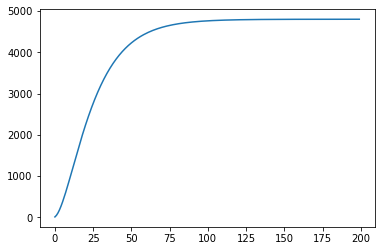

In [8]:
plt.plot(cs[:200])

In [9]:
print(value_table.reshape((4, 4)))
valudate_policy(env, value_table)

[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]


array([  0., -14., -20., -22., -14., -18., -20., -20., -20., -20., -18.,
       -14., -22., -20., -14.,   0.])